# Firearm Seizures by Neighborhood


In [1]:
import pandas as pd
import geopandas
%matplotlib inline

In [6]:
# import dataset of data dictionary
data_dict = pd.read_csv("Data-Dictionary.csv")
display(data_dict)

,column,type,label,description
0,address,text,Address,Block or intersection of seizure\r\n
1,total_count,int4,Total Count,Total number of fire arms seized.
2,other_count,int4,Other Count,Number of unclassified fire arms seized
3,pistol_count,int4,Pistol Count,Number of pistols seized
4,revolver_count,int4,Revolver Count,Number of revolver seized\r\n
5,rifle_count,int4,Rifle Count,Number of rifles seized
6,shotgun_count,int4,Shotgun Count,Number of shotguns seized
7,year,int4,Year,Year of fire arm seizure
8,month,int4,Month,Month of fire arm seizure
9,dow,int4,Day of the Week,Day of the week of fire arm seizure.\r\n\r\n* ...


In [16]:
# import dataset of firearm seizures
firearm_seizures = pd.read_csv("Firearm-Seizures.csv")
fSeizures_byHood = firearm_seizures.groupby("neighborhood").sum()["total_count"] # groupby neighborhood and sum the total number of seizures
fSeizures_byHood.sort_values(ascending=False)

neighborhood
Homewood South      345
South Side Flats    208
Homewood North      159
Brighton Heights    149
East Liberty        148
                   ... 
Mt. Oliver            4
Oakwood               4
Regent Square         4
Summer Hill           3
Swisshelm Park        3
Name: total_count, Length: 88, dtype: int64

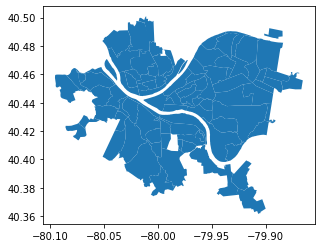

In [12]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [14]:
# do the merge
seizures_map = neighborhoods.merge(fSeizures_byHood, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
seizures_map[['hood','total_count','geometry']].head()

,hood,total_count,geometry
0,Central Oakland,20.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,21.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,14.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,57.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,24.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


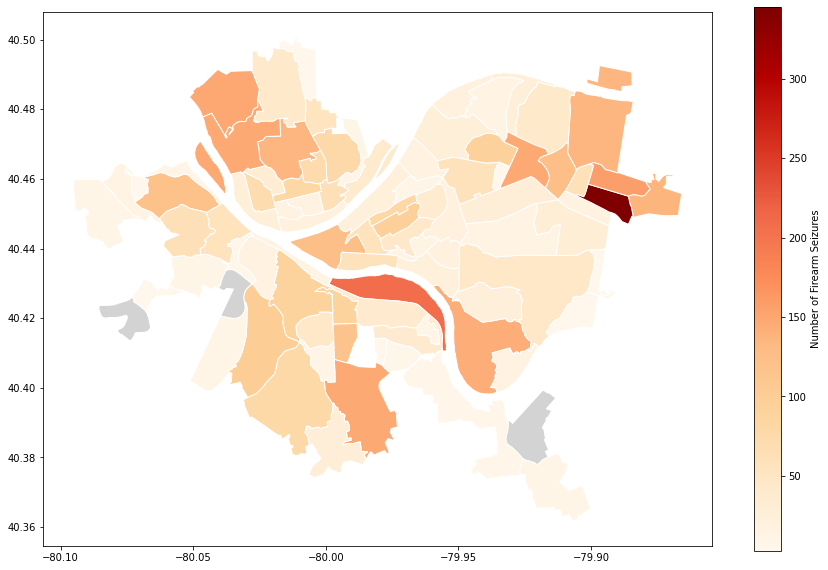

In [18]:
seizures_map.plot(column='total_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Firearm Seizures"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )